<a href="https://colab.research.google.com/github/sheetalbangalore/ORF-Senior-Thesis-Spring-Interim-Report/blob/main/Part_3_Senior_Thesis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

## **Read in the graph and the data frame**

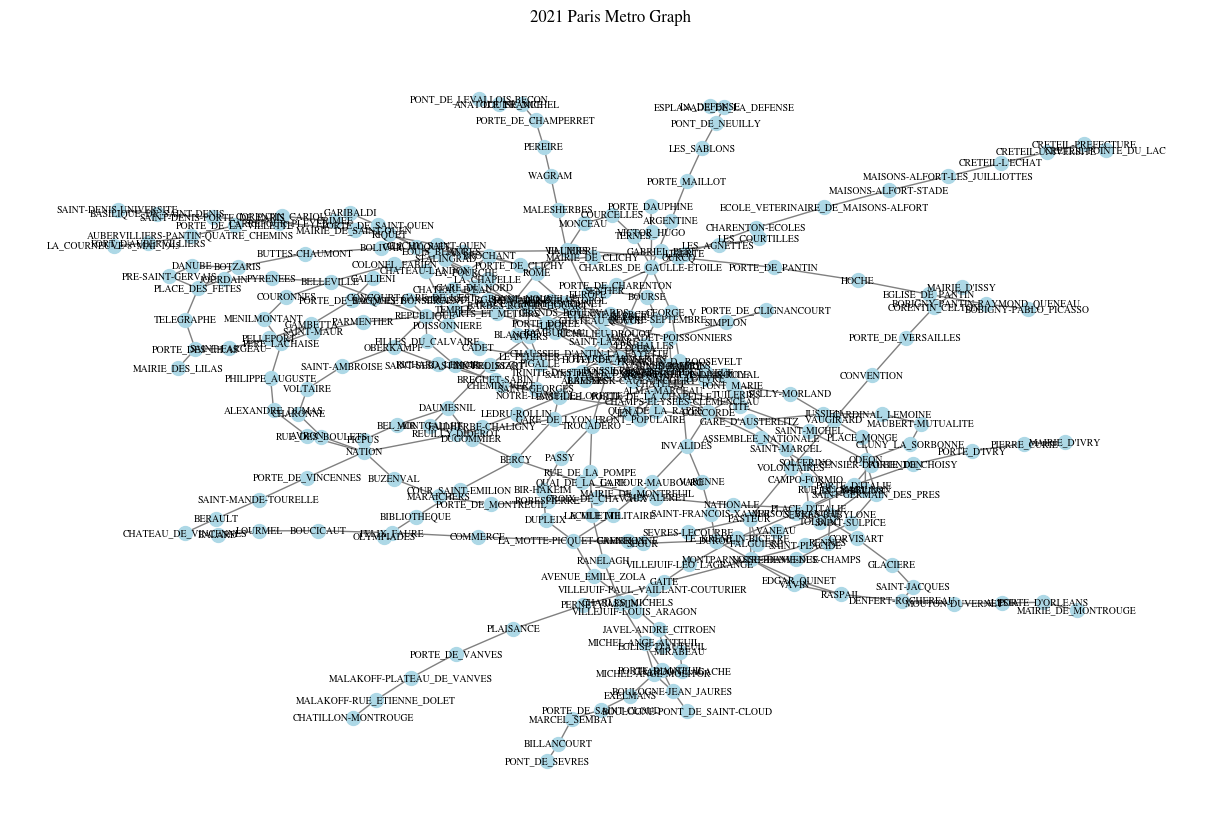

In [3]:
# Initialize an empty graph
G = nx.Graph()

# Read the graph file manually and parse edges
with open("graph_all_lines.txt", "r", encoding="utf-8") as file:
    for line in file:
        parts = line.strip().split(" ", 2)  # Split into first two parts + label dictionary
        if len(parts) == 3:
            node1, node2, attr_str = parts
            try:
                # Convert the attribute string into a dictionary
                attr_dict = eval(attr_str)  # Be cautious with eval() if the file is untrusted
                G.add_edge(node1, node2, **attr_dict)
            except SyntaxError:
                print(f"Skipping invalid line: {line.strip()}")

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=100, font_size=7, font_family = 'STIXGeneral')
plt.title("2021 Paris Metro Graph")
plt.show()

In [5]:
df_2021 = pd.read_csv("all_2021_data.csv")
# Replace spaces with underscores in station names
df_2021["Station"] = df_2021["Station"].str.replace(" ", "_")

# Display the updated DataFrame
display(df_2021)

ID Network                 Station   Traffic First Line Second Line  \
0      1   Metro            GARE_DU_NORD  34503097          4           5   
1      2   Metro            SAINT-LAZARE  33128384          3           9   
2      3   Metro            GARE_DE_LYON  28640475          1          14   
3      4   Metro  MONTPARNASSE-BIENVENUE  20407224          4           6   
4      5   Metro           GARE_DE_L'EST  15538471          4           5   
..   ...     ...                     ...       ...        ...         ...   
299  301   Metro                 BOLIVAR    367598       7bis         NaN   
300  302   Metro         BUTTES-CHAUMONT    358301       7bis         NaN   
301  303   Metro       PRE-SAINT-GERVAIS    282626       7bis         NaN   
302  304   Metro               PELLEPORT    229524       3bis         NaN   
303  305   Metro        EGLISE_D'AUTEUIL    124941         10         NaN   

    Third Line  Fourth Line  Fifth Line  Arrondissement for Paris   latitude  \
0          NaN          NaN         NaN                      10.0  48.880556   
1           12         13.0        14.0                       8.0  48.875490   
2            A          NaN         NaN                      12.0  48.844722   
3           12         13.0         NaN                      14.0  48.843466   
4            7          NaN         NaN                      10.0  48.876111   
..         ...          ...         ...                       ...        ...   
299        NaN          NaN         NaN                      19.0  48.880502   
300        NaN          NaN         NaN                      19.0  48.878500   
301        NaN          NaN         NaN                      19.0  48.880250   
302        NaN          NaN         NaN                      20.0  48.868671   
303        NaN          NaN         NaN                      16.0  48.847169   

     longitude  
0     2.355000  
1     2.326640  
2     2.373889  
3     2.323072  
4     2.358333  
..         ...  
299   2.374922  
300   2.381772  
301   2.398910  
302   2.401752  
303   2.269020  

[304 rows x 12 columns]

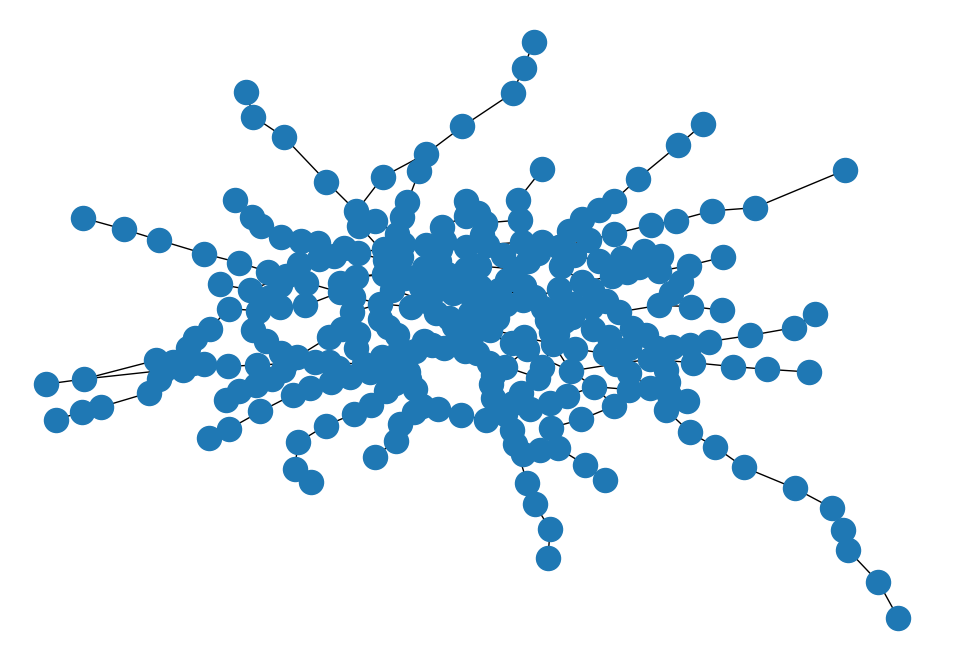

# of stations: 304


In [6]:
# Create a dictionary where keys are station names and values are (latitude, longitude) tuples
station_coordinates = {}
for index, row in df_2021.iterrows():
    station_coordinates[row['Station']] = (row['longitude'], row['latitude'])

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

# Extract longitude and latitude values from df1 to lists
longitude = df_2021['longitude'].tolist()
latitude = df_2021['latitude'].tolist()

plt.xlim([min(longitude) - 0.01, max(longitude) + 0.02])
plt.ylim([min(latitude) - 0.01 , max(latitude) + 0.01])
nx.draw(G, station_coordinates)
plt.show()  # Display the visualization

print("# of stations:", G.number_of_nodes())

## **The Simulation**

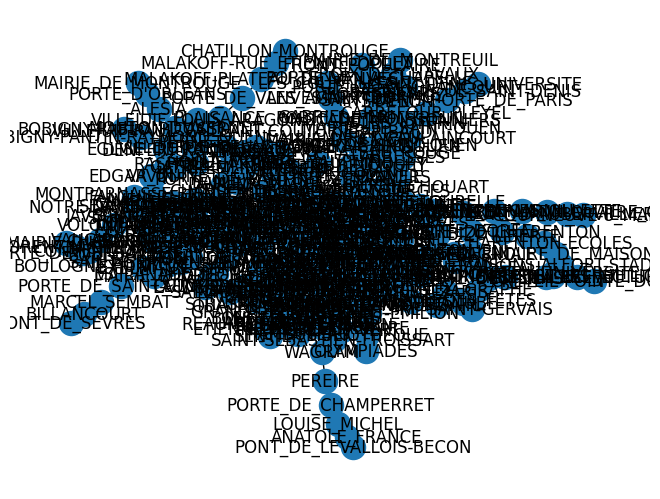

({'GAMBETTA': 0.0, 'PELLEPORT': 0.0012583556743763417, 'PORTE_DE_BAGNOLET': 0.0049281044134066405, 'PERE_LACHAISE': 0.00311483547150661, 'SAINT-FARGEAU': 0.0065202049109847945, 'PORTE_DES_LILAS': 0.00041212564260007515, 'JAURES': 0.0012142846929375825, 'STALINGRAD': 0.006690346929900986, 'LAUMIERE': 0.001605788926993862, 'BOLIVAR': 0.0016542911349689228, 'COLONEL_FABIEN': 0.005756790806013303, 'LOUIS_BLANC': 0.0019123582171998435, 'BOTZARIS': 0.0040298795519471305, 'BUTTES-CHAUMONT': 0.004587393010845068, 'DANUBE': 0.0044315521109524105, 'PLACE_DES_FETES': 0.006412253878922542, 'PRE-SAINT-GERVAIS': 0.001696740266533549, 'REPUBLIQUE': 0.0032782207922261233, 'TEMPLE': 5.0166612279520217e-05, 'PARMENTIER': 0.005341017780957233, 'OBERKAMPF': 0.004233875049815132, 'STRASBOURG-SAINT-DENIS': 0.004732239500355098, 'GONCOURT': 0.002006447445523294, 'FILLES_DU_CALVAIRE': 0.005749623694515574, 'JACQUES_BONSERGENT': 0.0001758860464678052, 'ARTS_ET_METIERS': 0.0047270308814647, 'NATION': 0.00186540

In [7]:
# Test out the inputs function for the G graph

def inputs():
    # Assign probability distributions and lambda values to each node
    for station in G.nodes():
        random_probs = {} # EVENTUALLY UPDATE THIS BECAUSE IT'S NOT REALISTIC
        for node in G.nodes():
            if node != station:
                random_probs[node] = np.random.rand()
            else :
                random_probs[node] = 0
        total = sum(random_probs.values())
        normalized_probs = {k: v / total for k, v in random_probs.items()}  # Normalize to sum to 1
        lambda_value = np.random.uniform(2, 10) # This will be overwritten anyways
        G.nodes[station]["data"] = (normalized_probs, lambda_value)

    return G

G = inputs()
nx.draw(G, with_labels = True)
plt.show()

for node in G.nodes():
    print(G.nodes[node]["data"])

In [8]:
def update_node_with_lambda(G, lambda_dictionary):
  for node in G.nodes():
    G.nodes[node]["lambda"] = lambda_dictionary[node]
  return G

def inputs():
    # Assign probability distributions and lambda values to each node
    for station in G.nodes():
        random_probs = {} # EVENTUALLY UPDATE THIS BECAUSE IT'S NOT REALISTIC
        for node in G.nodes():
            if node != station:
                random_probs[node] = np.random.rand()
            else :
                random_probs[node] = 0
        total = sum(random_probs.values())
        normalized_probs = {k: v / total for k, v in random_probs.items()}  # Normalize to sum to 1
        lambda_value = np.random.uniform(2, 10) # This line doesn't matter because these lambda values get overwritten
        G.nodes[station]["prob"] = normalized_probs
        G.nodes[station]["lambda"] = lambda_value
    return G

def simulate_arrivals(G, days):
    """Generates passenger arrivals at each station using a Poisson distribution."""
    arrivals = {}
    for station in G.nodes():
        _, lambda_value = G.nodes[station]["data"]
        arrivals[station] = np.random.poisson(lam=lambda_value, size=days)
    return arrivals

def simulate_passenger_journeys(G, daily_arrivals):
    journeys = []

    for station, arrivals in daily_arrivals.items():
        total_passengers = sum(arrivals)  # Total passengers arriving in the day

        for _ in range(total_passengers):
            destination = np.random.choice(stations)  # Random destination
            while destination == station:
                destination = np.random.choice([s for s in stations if s != station])

            path_nodes = nx.shortest_path(G, source=station, target=destination)
            path_edges = [(path_nodes[i], path_nodes[i + 1]) for i in range(len(path_nodes) - 1)]
            path_line_number = nx.get_edge_attributes(G, "label")
            path_length = nx.get_edge_attributes(G, "length")
            journeys.append(path_nodes)

    return journeys

def calculate_avg_transfers(G, results):
    """Calculates the average number of transfers that someone who starts at each station would have to make to get to their final destination."""

    station_transfers = {}  # Store total transfers for each starting station
    station_counts = {}    # Store the number of journeys starting from each station

    for person_id, journey in enumerate(results):
        start_station = journey[0]  # Get the starting station for this journey

        # If this is the first journey from this station, initialize counts
        station_transfers.setdefault(start_station, 0)
        station_counts.setdefault(start_station, 0)

        # Count the transfers for this journey (same logic as before)
        transfers = 0
        if len(journey) > 2:
            for i in range(len(journey) - 2):
                current_edge = (journey[i], journey[i + 1])
                next_edge = (journey[i + 1], journey[i + 2])
                if G.get_edge_data(*current_edge).get("label") != G.get_edge_data(*next_edge).get("label"):
                    transfers += 1

        station_transfers[start_station] += transfers  # Add transfers for this journey
        station_counts[start_station] += 1           # Increment journey count for this station

    # Calculate averages
    avg_transfers = {}
    for station in station_transfers:
        avg_transfers[station] = station_transfers[station] / station_counts[station]

    return avg_transfers

lambda_dictionary = dict(zip(df_2021['Station'], df_2021['Traffic'] / 365))
G = inputs()
stations = list(G.nodes())
daily_arrivals = simulate_arrivals(G, 1)
G = update_node_with_lambda(G, lambda_dictionary)
results = simulate_passenger_journeys(G, daily_arrivals) # Run the simulation

print(results)

# Create a list to store the data for the DataFrame
data_results = []
for i, journey in enumerate(results):
    data_results.append({'person_id': i + 1, 'path': journey})  # Store the entire path

# Create a DataFrame from the data
df_results = pd.DataFrame(data_results)

# Print the DataFrame
display(df_results)

# Calculate and print the average transfers
avg_transfers_result = calculate_avg_transfers(G, results)
print("The average # transfers a person who starts at each station needs to make to get to their destination")
print(avg_transfers_result)

[['GAMBETTA', 'PERE_LACHAISE', 'MENILMONTANT', 'COURONNES', 'BELLEVILLE', 'COLONEL_FABIEN', 'JAURES', 'STALINGRAD', 'RIQUET'], ['GAMBETTA', 'PERE_LACHAISE', 'MENILMONTANT', 'COURONNES'], ['GAMBETTA', 'PERE_LACHAISE', 'SAINT-MAUR', 'PARMENTIER', 'REPUBLIQUE', 'STRASBOURG-SAINT-DENIS', 'BONNE_NOUVELLE', 'GRANDS_BOULEVARDS', 'RICHELIEU-DROUOT', 'OPERA', 'MADELEINE', 'CONCORDE', 'CHAMPS-ELYSEES-CLEMENCEAU', 'FRANKLIN_D._ROOSEVELT', 'GEORGE_V'], ['PELLEPORT', 'GAMBETTA', 'PERE_LACHAISE', 'SAINT-MAUR', 'PARMENTIER', 'REPUBLIQUE', 'STRASBOURG-SAINT-DENIS', 'BONNE_NOUVELLE', 'GRANDS_BOULEVARDS', 'RICHELIEU-DROUOT', 'OPERA', 'MADELEINE', 'CONCORDE', 'INVALIDES', 'LA_TOUR-MAUBOURG', 'ECOLE_MILITAIRE', 'LA_MOTTE-PICQUET-GRENELLE', 'CAMBRONNE'], ['PELLEPORT', 'GAMBETTA', 'PERE_LACHAISE', 'SAINT-MAUR', 'PARMENTIER', 'REPUBLIQUE', 'STRASBOURG-SAINT-DENIS', 'BONNE_NOUVELLE', 'GRANDS_BOULEVARDS', 'RICHELIEU-DROUOT', 'OPERA', 'MADELEINE', 'CONCORDE', 'INVALIDES', 'VARENNE', 'SAINT-FRANCOIS-XAVIER'], ['

person_id                                               path
0             1  [GAMBETTA, PERE_LACHAISE, MENILMONTANT, COURON...
1             2  [GAMBETTA, PERE_LACHAISE, MENILMONTANT, COURON...
2             3  [GAMBETTA, PERE_LACHAISE, SAINT-MAUR, PARMENTI...
3             4  [PELLEPORT, GAMBETTA, PERE_LACHAISE, SAINT-MAU...
4             5  [PELLEPORT, GAMBETTA, PERE_LACHAISE, SAINT-MAU...
...         ...                                                ...
1855       1856  [PONT_DE_NEUILLY, LES_SABLONS, PORTE_MAILLOT, ...
1856       1857  [PONT_DE_NEUILLY, LES_SABLONS, PORTE_MAILLOT, ...
1857       1858  [PONT_DE_NEUILLY, LES_SABLONS, PORTE_MAILLOT, ...
1858       1859  [ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...
1859       1860  [ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...

[1860 rows x 2 columns]

The average # transfers a person who starts at each station needs to make to get to their destination
{'GAMBETTA': 2.6666666666666665, 'PELLEPORT': 4.2, 'PORTE_DE_BAGNOLET': 4.4, 'PERE_LACHAISE': 2.5454545454545454, 'SAINT-FARGEAU': 5.0, 'PORTE_DES_LILAS': 4.545454545454546, 'JAURES': 2.6666666666666665, 'STALINGRAD': 2.8333333333333335, 'LAUMIERE': 3.0, 'BOLIVAR': 4.285714285714286, 'COLONEL_FABIEN': 5.0, 'LOUIS_BLANC': 3.5, 'BOTZARIS': 2.5, 'BUTTES-CHAUMONT': 4.0, 'DANUBE': 3.0, 'PLACE_DES_FETES': 2.6363636363636362, 'PRE-SAINT-GERVAIS': 1.0, 'REPUBLIQUE': 1.3333333333333333, 'TEMPLE': 2.6, 'PARMENTIER': 2.6, 'OBERKAMPF': 2.0, 'STRASBOURG-SAINT-DENIS': 1.5, 'GONCOURT': 2.5, 'FILLES_DU_CALVAIRE': 2.1, 'JACQUES_BONSERGENT': 2.7142857142857144, 'ARTS_ET_METIERS': 1.5, 'NATION': 2.3, 'REUILLY-DIDEROT': 4.0, 'AVRON': 3.25, 'PICPUS': 3.3333333333333335, 'BUZENVAL': 2.5, 'RUE_DES_BOULETS': 2.75, 'PORTE_DE_VINCENNES': 2.3333333333333335, 'CHATELET': 1.1666666666666667, 'LOUVRE': 2.5, 'CITE':

In [9]:
def find_changing_stations(G, results):
    changing_stations_per_person = {}  # Dictionary to store changing stations for each person

    for person_id, journey in enumerate(results):
        changing_stations = []

        if len(journey) > 2:  # Only check for changes if the journey involves more than 2 stations
          for i in range(len(journey) - 2):
              current_edge = (journey[i], journey[i + 1])
              next_edge = (journey[i + 1], journey[i + 2])

              current_line = G.get_edge_data(*current_edge).get("label")  # Get the line of the current edge
              next_line = G.get_edge_data(*next_edge).get("label")  # Get the line of the next edge

              if current_line != next_line:  # If lines are different, it's a changing station
                  changing_stations.append(journey[i + 1])

        changing_stations_per_person[person_id + 1] = changing_stations  # Store for this person

    return changing_stations_per_person

def calculate_transfers_per_station(changing_stations_result):
    transfer_counts = {}  # Initialize an empty dictionary to store transfer counts for each station

    for person_transfers in changing_stations_result.values():  # Iterate through transfer stations for each person
        for station in person_transfers:  # Iterate through transfer stations for this person
            transfer_counts[station] = transfer_counts.get(station, 0) + 1  # Increment transfer count for this station

    return transfer_counts

changing_stations_result = find_changing_stations(G, results)
print(changing_stations_result)
transfer_counts_result = calculate_transfers_per_station(changing_stations_result)

# Print and download the data from transfer_counts_result
print("Number of transfers that happen at each station:", transfer_counts_result)
transfer_counts_result_df = pd.DataFrame(list(transfer_counts_result.items()), columns=['Station', 'Transfer_Count'])
transfer_counts_result_df = transfer_counts_result_df.sort_values(by=['Transfer_Count'], ascending=False) # Sort by transfer count in descending order
transfer_counts_result_df.to_csv("transfer_counts_result.csv", index=False)

# Add the 'transfer_stations' column to the DataFrame
df_results['transfer_stations'] = df_results['person_id'].apply(lambda person_id: changing_stations_result.get(person_id, []))

# Display the updated DataFrame
display(df_results)

df_results.to_csv("df_results.csv", index=False)

{1: ['PERE_LACHAISE', 'JAURES', 'STALINGRAD'], 2: ['PERE_LACHAISE'], 3: ['REPUBLIQUE', 'RICHELIEU-DROUOT', 'MADELEINE', 'CONCORDE'], 4: ['GAMBETTA', 'REPUBLIQUE', 'RICHELIEU-DROUOT', 'MADELEINE', 'CONCORDE', 'LA_MOTTE-PICQUET-GRENELLE'], 5: ['GAMBETTA', 'REPUBLIQUE', 'RICHELIEU-DROUOT', 'MADELEINE', 'CONCORDE', 'INVALIDES'], 6: ['GAMBETTA', 'REPUBLIQUE', 'CHATELET'], 7: ['GAMBETTA', 'REPUBLIQUE', 'GARE_DU_NORD'], 8: ['GAMBETTA', 'REPUBLIQUE', 'CHATELET'], 9: ['REPUBLIQUE', 'RICHELIEU-DROUOT', 'MADELEINE', 'CONCORDE'], 10: ['REPUBLIQUE', 'OBERKAMPF'], 11: ['REPUBLIQUE', 'RICHELIEU-DROUOT', 'OPERA', 'SAINT-LAZARE', 'MAIRIE_DE_SAINT-OUEN'], 12: ['REPUBLIQUE', 'RICHELIEU-DROUOT', 'OPERA', 'SAINT-LAZARE', 'PORTE_DE_CLICHY'], 13: ['PERE_LACHAISE', 'NATION', 'GARE_DE_LYON', 'CHATELET', 'MONTPARNASSE-BIENVENUE', 'PASTEUR'], 14: ['NATION', 'GARE_DE_LYON', 'CHATELET', 'ODEON'], 15: ['REPUBLIQUE', 'RICHELIEU-DROUOT', 'MADELEINE', 'CONCORDE'], 16: ['REPUBLIQUE', 'GARE_DU_NORD', 'BARBES-ROCHECHOUAR

person_id                                               path  \
0             1  [GAMBETTA, PERE_LACHAISE, MENILMONTANT, COURON...   
1             2  [GAMBETTA, PERE_LACHAISE, MENILMONTANT, COURON...   
2             3  [GAMBETTA, PERE_LACHAISE, SAINT-MAUR, PARMENTI...   
3             4  [PELLEPORT, GAMBETTA, PERE_LACHAISE, SAINT-MAU...   
4             5  [PELLEPORT, GAMBETTA, PERE_LACHAISE, SAINT-MAU...   
...         ...                                                ...   
1855       1856  [PONT_DE_NEUILLY, LES_SABLONS, PORTE_MAILLOT, ...   
1856       1857  [PONT_DE_NEUILLY, LES_SABLONS, PORTE_MAILLOT, ...   
1857       1858  [PONT_DE_NEUILLY, LES_SABLONS, PORTE_MAILLOT, ...   
1858       1859  [ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...   
1859       1860  [ESPLANADE_DE_LA_DEFENSE, PONT_DE_NEUILLY, LES...   

                                      transfer_stations  
0                   [PERE_LACHAISE, JAURES, STALINGRAD]  
1                                       [PERE_LACHAISE]  
2     [REPUBLIQUE, RICHELIEU-DROUOT, MADELEINE, CONC...  
3     [GAMBETTA, REPUBLIQUE, RICHELIEU-DROUOT, MADEL...  
4     [GAMBETTA, REPUBLIQUE, RICHELIEU-DROUOT, MADEL...  
...                                                 ...  
1855                    [CONCORDE, MADELEINE, CHATELET]  
1856                [CONCORDE, MADELEINE, GARE_DE_LYON]  
1857  [CHAMPS-ELYSEES-CLEMENCEAU, MONTPARNASSE-BIENV...  
1858                    [CONCORDE, MADELEINE, CHATELET]  
1859  [CONCORDE, MADELEINE, RICHELIEU-DROUOT, REPUBL...  

[1860 rows x 3 columns]

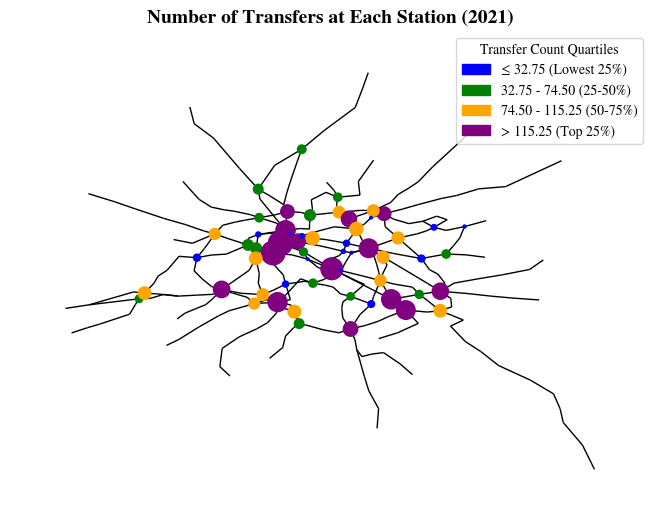

In [10]:
# The result shows the number of people transferring at each station

# Get transfer counts result values
transfer_counts_result_values = list(transfer_counts_result.values())

# Compute quartiles
q1, q2, q3 = np.percentile(transfer_counts_result_values, [25, 50, 75])

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(transfer_counts_result.get(station, 0)) for station in G.nodes()]

# Get node sizes based on transfer_counts_result
node_sizes = [transfer_counts_result.get(station, 0) * 0.8 for station in G.nodes()]  # Scale size for better visualization

# Get node positions from station_coordinates
pos = {station: station_coordinates[station] for station in G.nodes()}

# Draw the graph with node sizes and positions
nx.draw(G, pos=pos, with_labels=False, node_size=node_sizes, node_color = node_colors, font_family = 'STIXGeneral')

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest 25%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} (25-50%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} (50-75%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top 25%)"),
]

plt.legend(handles=legend_patches, title="Transfer Count Quartiles", loc="upper right")

# Add a title
plt.title("Number of Transfers at Each Station (2021)", fontsize=14, fontweight="bold")

plt.savefig("transfer_counts_result_graph.pdf")

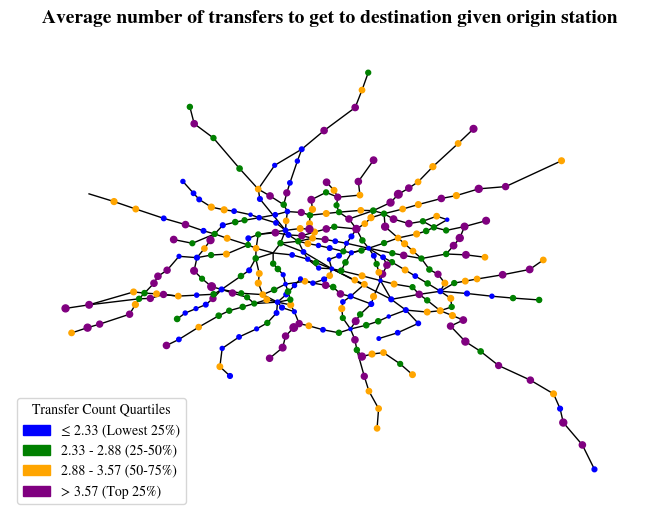

In [17]:
# The average number of transfers a person who starts at each station needs to make to get to their destination

# Get transfer counts result values
avg_transfers_result_values = list(avg_transfers_result.values())

# Compute quartiles
q1, q2, q3 = np.percentile(avg_transfers_result_values, [25, 50, 75])

# Function to assign colors based on quartiles
def assign_color(value):
    if value <= q1:
        return "blue"
    elif value <= q2:
        return "green"
    elif value <= q3:
        return "orange"
    else:
        return "purple"

# Assign colors to each node
node_colors = [assign_color(avg_transfers_result.get(station, 0)) for station in G.nodes()]

# Get node sizes based on transfer_counts_result
node_sizes = [avg_transfers_result.get(station, 0) * 5 for station in G.nodes()]  # Scale size for better visualization

# Get node positions from station_coordinates
pos = {station: station_coordinates[station] for station in G.nodes()}

# Draw the graph with node sizes and positions
nx.draw(G, pos=pos, with_labels=False, node_size=node_sizes, node_color = node_colors, font_family = 'STIXGeneral')

# Create a legend
legend_patches = [
    mpatches.Patch(color="blue", label=f"≤ {q1:.2f} (Lowest 25%)"),
    mpatches.Patch(color="green", label=f"{q1:.2f} - {q2:.2f} (25-50%)"),
    mpatches.Patch(color="orange", label=f"{q2:.2f} - {q3:.2f} (50-75%)"),
    mpatches.Patch(color="purple", label=f"> {q3:.2f} (Top 25%)"),
]

plt.legend(handles=legend_patches, title="Transfer Count Quartiles", loc="lower left")

# Add a title
plt.title("Average number of transfers to get to destination given origin station", fontsize=14, fontweight="bold")

plt.savefig("avg_transfers_result_graph.pdf")